In [1]:
# import semua lib yang diperlukan
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error 
#import requests
#import json
#from types import SimpleNamespace
# from pandas.io.json import json_normalize

In [2]:
# read file csv
df = pd.read_csv('dataset/daging sapi.csv')
# ambil data dari API Priangan
#r = requests.get('http://dev.priangan.org/api/api/graphic_data/2/1/day/price/2012-01-01/2021-2-15/0/city/-/eceran/null')
#df = r.json()
df

,status,message,data__total,data__result__value,data__result__time,data__result__date,data__result__span,data__average,data__location_id,data__commodity_id,data__legend,data__commodity_name,stat__|,stat__|__total,stat__|__nb_data,stat__|__avg
0,ok,NaN,216232320.0,59000,"January 3, 2009",2009-01-03,3,97534.0,1.0,6.0,Harga Kota Bandung,Daging Sapi,"January 3, 2009",59000,1,59000
1,NaN,NaN,NaN,59000,"January 4, 2009",2009-01-04,4,NaN,NaN,NaN,NaN,NaN,"January 4, 2009",59000,1,59000
2,NaN,NaN,NaN,59000,"January 5, 2009",2009-01-05,5,NaN,NaN,NaN,NaN,NaN,"January 5, 2009",59000,1,59000
3,NaN,NaN,NaN,59000,"January 6, 2009",2009-01-06,6,NaN,NaN,NaN,NaN,NaN,"January 6, 2009",59000,1,59000
4,NaN,NaN,NaN,59000,"January 7, 2009",2009-01-07,7,NaN,NaN,NaN,NaN,NaN,"January 7, 2009",59000,1,59000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,NaN,NaN,NaN,116000,"March 2, 2020",2020-03-02,62,NaN,NaN,NaN,NaN,NaN,"March 2, 2020",116000,1,116000
2213,NaN,NaN,NaN,116000,"March 3, 2020",2020-03-03,63,NaN,NaN,NaN,NaN,NaN,"March 3, 2020",116000,1,116000
2214,NaN,NaN,NaN,116000,"March 4, 2020",2020-03-04,64,NaN,NaN,NaN,NaN,NaN,"March 4, 2020",116000,1,116000
2215,NaN,NaN,NaN,120000,"March 5, 2020",2020-03-05,65,NaN,NaN,NaN,NaN,NaN,"March 5, 2020",120000,1,120000


In [3]:
#data cleaning(hapus data yang tidak terpakai)
df.drop(['status','message','data__total','data__result__time','data__result__span','data__average','data__location_id','data__commodity_id','data__legend','data__commodity_name','stat__|','stat__|__total','stat__|__nb_data','stat__|__avg'], axis=1, inplace=True)
df.head()

,data__result__value,data__result__date
0,59000,2009-01-03
1,59000,2009-01-04
2,59000,2009-01-05
3,59000,2009-01-06
4,59000,2009-01-07


In [4]:
# ubah nama kolom jadi Y dan DS
df.columns=['y','ds']
df.head()

,y,ds
0,59000,2009-01-03
1,59000,2009-01-04
2,59000,2009-01-05
3,59000,2009-01-06
4,59000,2009-01-07


In [5]:
#start year 2011
#start_date = "2011-01-01"
#df = df.loc[df.ds > start_date].copy()

In [6]:
# Split data training dan testing
split_date = "2019-01-01"
df_train = df.loc[df.ds <= split_date].copy() 
df_test = df.loc[df.ds > split_date].copy()
df_train.tail()

,y,ds
2015,118000,2018-12-18
2016,118000,2018-12-19
2017,118333,2018-12-20
2018,119000,2018-12-27
2019,118333,2018-12-28


In [7]:
df_test.head()

,y,ds
2020,120000,2019-01-02
2021,119000,2019-01-04
2022,119000,2019-01-07
2023,118000,2019-01-08
2024,118571,2019-01-10


In [8]:
# fitting model
m = Prophet()
m.add_country_holidays(country_name = 'ID')
m.fit(df_train)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\azra\anaconda3\lib\site-packages\fbprophet\hdays.py:105: Warning: We only support Nyepi holiday from 2009 to 2019
  warnings.warn(warning_msg, Warning)


In [9]:
# bikin prediksi dari model yang udah dibuat
forecast = m.predict(df_test)
forecast.tail()

C:\Users\azra\anaconda3\lib\site-packages\fbprophet\hdays.py:105: Warning: We only support Nyepi holiday from 2009 to 2019
  warnings.warn(warning_msg, Warning)
C:\Users\azra\anaconda3\lib\site-packages\fbprophet\hdays.py:105: Warning: We only support Nyepi holiday from 2009 to 2019
  warnings.warn(warning_msg, Warning)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Ascension of Jesus,Ascension of Jesus_lower,Ascension of Jesus_upper,Ascension of the Prophet,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
192,2020-03-02,115417.982961,101967.030413,127970.998003,109967.702766,120631.300011,0.0,0.0,0.0,0.0,...,541.905228,541.905228,541.905228,-794.692560,-794.692560,-794.692560,0.0,0.0,0.0,115165.195628
193,2020-03-03,115416.452450,101732.890069,128623.889898,109948.066907,120694.750734,0.0,0.0,0.0,0.0,...,1129.921832,1129.921832,1129.921832,-803.354392,-803.354392,-803.354392,0.0,0.0,0.0,115743.019890
194,2020-03-04,115414.921939,102099.652370,128831.498794,109915.803383,120757.934337,0.0,0.0,0.0,0.0,...,523.317664,523.317664,523.317664,-800.024107,-800.024107,-800.024107,0.0,0.0,0.0,115138.215497
195,2020-03-05,115413.391429,102358.944790,129726.073369,109907.167111,120821.117939,0.0,0.0,0.0,0.0,...,1495.382259,1495.382259,1495.382259,-785.063756,-785.063756,-785.063756,0.0,0.0,0.0,116123.709931
196,2020-03-08,115408.799896,97248.763040,125042.696747,109861.636361,120862.226641,0.0,0.0,0.0,0.0,...,-3647.472104,-3647.472104,-3647.472104,-676.942932,-676.942932,-676.942932,0.0,0.0,0.0,111084.384861


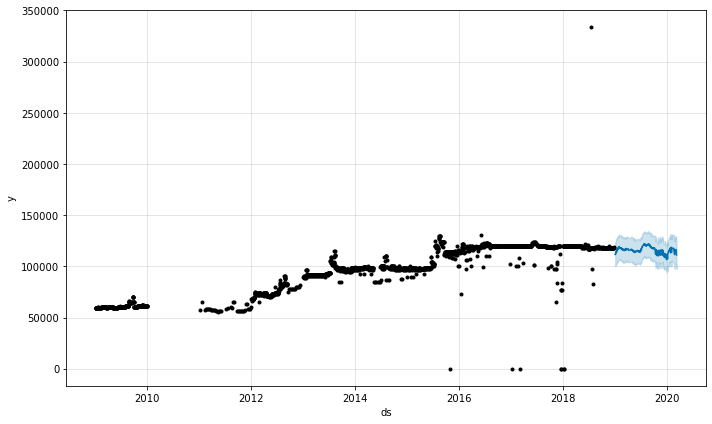

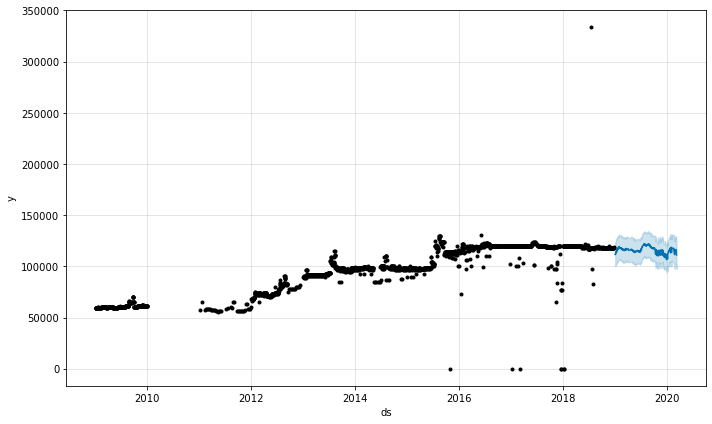

In [10]:
m.plot(forecast)

C:\Users\azra\anaconda3\lib\site-packages\fbprophet\hdays.py:105: Warning: We only support Nyepi holiday from 2009 to 2019
  warnings.warn(warning_msg, Warning)
C:\Users\azra\anaconda3\lib\site-packages\fbprophet\hdays.py:105: Warning: We only support Nyepi holiday from 2009 to 2019
  warnings.warn(warning_msg, Warning)


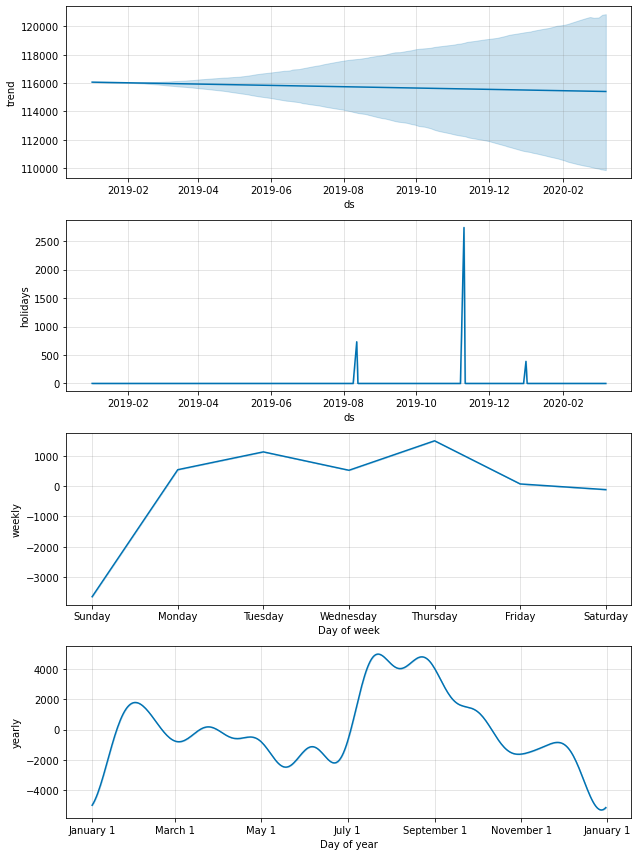

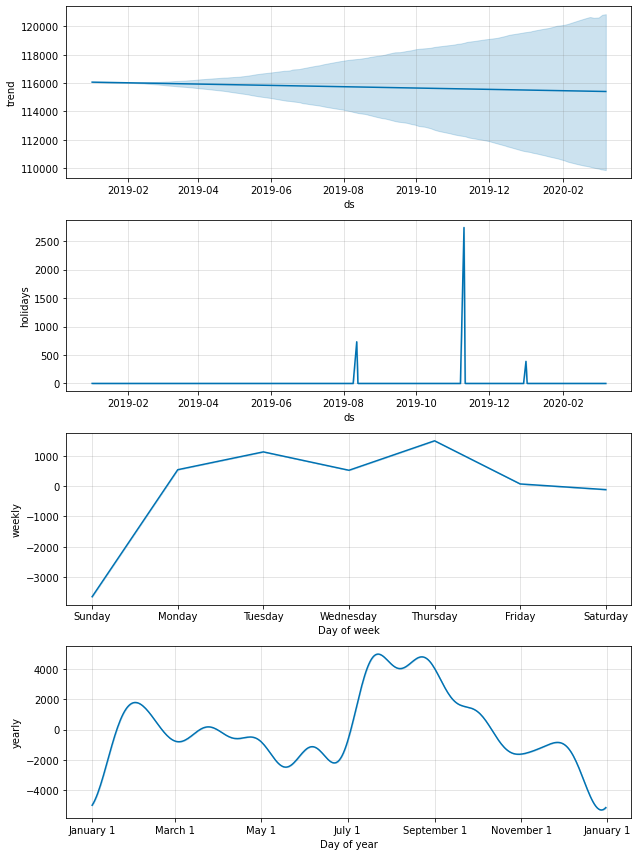

In [11]:
m.plot_components(forecast)

In [12]:
#itung MSE
mse = mean_squared_error(y_true = df_test["y"], y_pred = forecast['yhat'])
mse

15508259.59711706

In [13]:
#itung MAE
mae = mean_absolute_error(y_true = df_test["y"], y_pred = forecast['yhat'])
mae


2850.3554982213477

In [14]:
#itung MAPE
def mean_abs_perc_err(y_true, y_pred) :
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_abs_perc_err(y_true = np.asarray(df_test["y"]), y_pred = np.asarray(forecast['yhat']))
mape

2.402200001877791

In [15]:
#itung akurasi
akurasi = 100 - mape
akurasi

97.59779999812221